## TensorFlow Tutorial

See https://www.datacamp.com/community/tutorials/tensorflow-tutorial

In [108]:
import tensorflow as tf
import os

rootPath = "data"
trainDataDirectory = os.path.join(rootPath, "belgium_traffic_signs", "Training")
testDataDirectory = os.path.join(rootPath, "belgium_traffic_signs", "Testing")

In [109]:
import skimage

def loadData(dataDirectory):
    
    directories = [d for d in os.listdir(dataDirectory)
                  if os.path.isdir(os.path.join(dataDirectory, d))]
    
    labels = []
    images = []
    
    for d in directories:
        labelDirectory = os.path.join(dataDirectory, d)
        fileNames = [os.path.join(labelDirectory, f)
                    for f in os.listdir(labelDirectory) if f.endswith(".ppm")]
        for f in fileNames:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    return images, labels

In [110]:
images, labels = loadData(trainDataDirectory)

In [111]:
import numpy as np

images = np.array(images)
labels = np.array(labels)

print("images.ndim = {}, images.size = {}".format(images.ndim, images.size))

images.ndim = 1, images.size = 4575


In [112]:
#images[0]
print("labels.ndim = {}, labels.size = {}, distinct labels: {}".format(
    labels.ndim, labels.size, np.unique(labels).size))

labels.ndim = 1, labels.size = 4575, distinct labels: 62


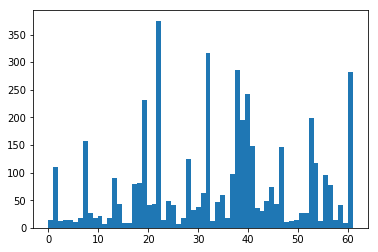

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

plt.hist(labels, 62);

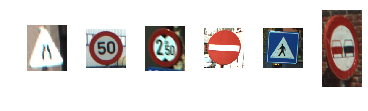

In [114]:
traffic_signs = [300, 2250, 3650, 4000, 233, 11]
fig = plt.figure()
for i in range(len(traffic_signs)):
    ax = fig.add_subplot(1, len(traffic_signs), i + 1)
    ax.set_axis_off()
    ax.imshow(images[traffic_signs[i]])

fig.subplots_adjust(wspace = 0.5)

shape: (64, 55, 3), min: 15, max: 255
shape: (95, 95, 3), min: 19, max: 255
shape: (82, 71, 3), min: 0, max: 255
shape: (260, 255, 3), min: 0, max: 255
shape: (179, 177, 3), min: 0, max: 255
shape: (158, 81, 3), min: 11, max: 212


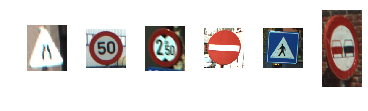

In [115]:
fig = plt.figure()
for i in range(len(traffic_signs)):
    ax = fig.add_subplot(1, len(traffic_signs), i + 1)
    ax.set_axis_off()
    ax.imshow(images[traffic_signs[i]])
    print("shape: {}, min: {}, max: {}".format(images[traffic_signs[i]].shape,
                                              images[traffic_signs[i]].min(),
                                              images[traffic_signs[i]].max()))

fig.subplots_adjust(wspace = 0.5)

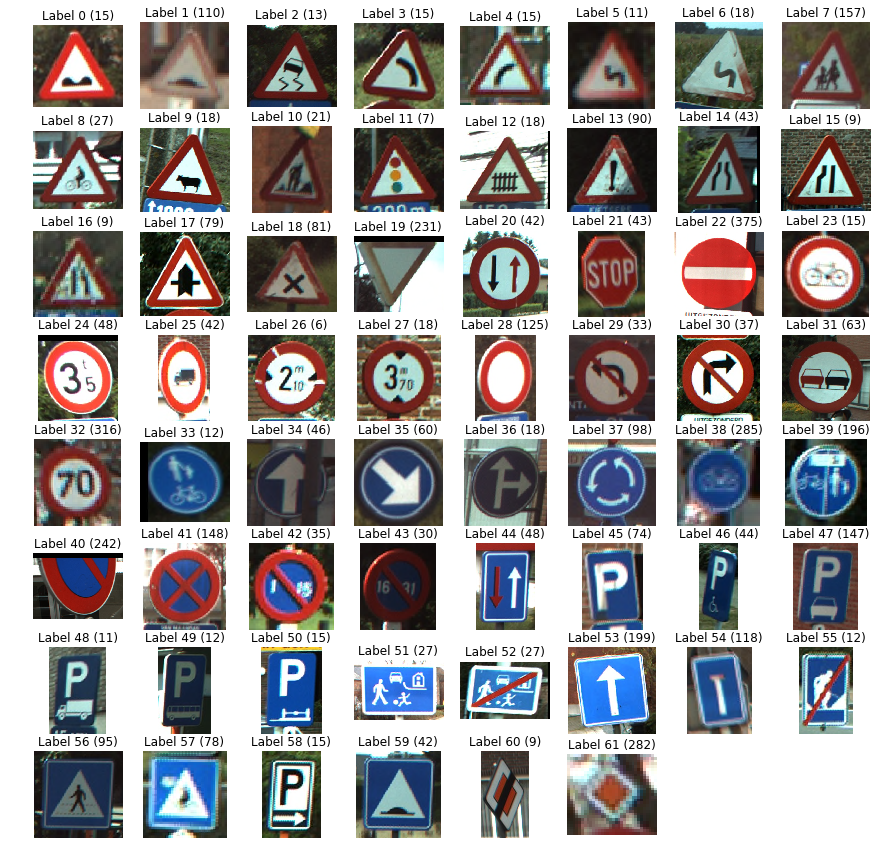

In [116]:
uniqueLabels = np.unique(labels)
fig = plt.figure()
fig.set_size_inches(15, 15)
i = 0
for label in uniqueLabels:
    image = images[np.where(labels == label)[0][0]]
    ax = fig.add_subplot(8, 8, i + 1)
    i += 1
    ax.set_axis_off()
    ax.set_title("Label {0} ({1})".format(label, np.count_nonzero(labels == label)))
    ax.imshow(image)
    
#np.where(labels == 10)[0][0]

In [181]:
from skimage import transform
newSize = 32

images28 = [transform.resize(image, (newSize, newSize), 
                             mode = 'constant', anti_aliasing = True) for image in images]

shape: (32, 32, 3), min: 0.059129901960784256, max: 1.0
shape: (32, 32, 3), min: 0.10888576133578554, max: 0.9921568627450981
shape: (32, 32, 3), min: 0.04156518075980392, max: 0.996078431372549
shape: (32, 32, 3), min: 0.11519224877450968, max: 0.996078431372549
shape: (32, 32, 3), min: 0.057107843137255726, max: 0.8081495098039219
shape: (32, 32, 3), min: 0.06629901960784312, max: 0.7814338235294118


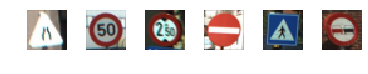

In [182]:
fig = plt.figure()
for i in range(len(traffic_signs)):
    ax = fig.add_subplot(1, len(traffic_signs), i + 1)
    ax.set_axis_off()
    ax.imshow(images28[traffic_signs[i]])
    print("shape: {}, min: {}, max: {}".format(images28[traffic_signs[i]].shape,
                                              images28[traffic_signs[i]].min(),
                                              images28[traffic_signs[i]].max()))

fig.subplots_adjust(wspace = 0.5)

In [183]:
from skimage.color import rgb2gray

images28 = np.array(images28)
images28 = rgb2gray(images28)

shape: (32, 32), min: 0.06118068321078426, max: 0.9988839215686275
shape: (32, 32), min: 0.12920348996629916, max: 0.9819392218137255
shape: (32, 32), min: 0.055086971698835994, max: 0.9568491999846814
shape: (32, 32), min: 0.157948622855392, max: 0.996078431372549
shape: (32, 32), min: 0.06749004289215714, max: 0.770832311676624
shape: (32, 32), min: 0.07575449352787988, max: 0.7689864964384191


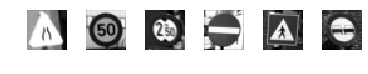

In [184]:
fig = plt.figure()
for i in range(len(traffic_signs)):
    ax = fig.add_subplot(1, len(traffic_signs), i + 1)
    ax.set_axis_off()
    ax.imshow(images28[traffic_signs[i]], cmap='gray')
    print("shape: {}, min: {}, max: {}".format(images28[traffic_signs[i]].shape,
                                              images28[traffic_signs[i]].min(),
                                              images28[traffic_signs[i]].max()))

fig.subplots_adjust(wspace = 0.5)

In [185]:
images28.shape

(4575, 32, 32)

In [186]:
# Training

# Initialize placeholders
x = tf.placeholder(dtype = tf.float64, shape = [None, newSize, newSize])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the images
imagesFlat = tf.contrib.layers.flatten(x)

# Fully connected layer
logitsHidden = tf.contrib.layers.fully_connected(imagesFlat, 64, tf.nn.relu)
#logitsHidden1 = tf.contrib.layers.fully_connected(logitsHidden, 128, tf.nn.relu)
#logits = tf.contrib.layers.fully_connected(imagesFlat, 62, tf.nn.relu)
logits = tf.contrib.layers.fully_connected(logitsHidden, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y,
                                                                    logits = logits))

# Define an optimizer
trainOp = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

# Convert logits to label indices
correctPred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float64))

In [187]:
print("imagesFlat: {}\nlogits: {}\nloss: {}\ntrainOp: {}\ncorrectPred: {}\naccuracy: {}".format(
    imagesFlat, logits, loss, trainOp, correctPred, accuracy))

imagesFlat: Tensor("Flatten_15/flatten/Reshape:0", shape=(?, 1024), dtype=float64)
logits: Tensor("fully_connected_21/Relu:0", shape=(?, 62), dtype=float64)
loss: Tensor("Mean_22:0", shape=(), dtype=float64)
trainOp: name: "Adam_11"
op: "NoOp"
input: "^Adam_11/update_fully_connected_20/weights/ApplyAdam"
input: "^Adam_11/update_fully_connected_20/biases/ApplyAdam"
input: "^Adam_11/update_fully_connected_21/weights/ApplyAdam"
input: "^Adam_11/update_fully_connected_21/biases/ApplyAdam"
input: "^Adam_11/Assign"
input: "^Adam_11/Assign_1"

correctPred: Tensor("ArgMax_11:0", shape=(?,), dtype=int64)
accuracy: Tensor("Mean_23:0", shape=(), dtype=float64)


In [188]:
tf.set_random_seed(1234)

#with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for i in range(301):
    #print("EPOCH {}...".format(i))
    _, lossValue = sess.run([trainOp, loss], feed_dict = {x: images28, y: labels})
    if i % 10 == 0:
        print("Loss (epoch {}): {}".format(i, lossValue))
    #print('Done with epoch {}.'.format(i))

Loss (epoch 0): 4.161684591559337
Loss (epoch 10): 3.6274225592715594
Loss (epoch 20): 3.311957793181447
Loss (epoch 30): 3.0584821435981255
Loss (epoch 40): 2.852225992864218
Loss (epoch 50): 2.6821055381103234
Loss (epoch 60): 2.5416561553515753
Loss (epoch 70): 2.42683632132647
Loss (epoch 80): 2.331852441444467
Loss (epoch 90): 2.2520667047636196
Loss (epoch 100): 2.1836398787763445
Loss (epoch 110): 2.1241542497298775
Loss (epoch 120): 2.071959687855717
Loss (epoch 130): 2.025715110866788
Loss (epoch 140): 1.984331617367468
Loss (epoch 150): 1.94702487538515
Loss (epoch 160): 1.9131229868839215
Loss (epoch 170): 1.8821140647815404
Loss (epoch 180): 1.8536127321917737
Loss (epoch 190): 1.8273104925482333
Loss (epoch 200): 1.8028858548368052
Loss (epoch 210): 1.7801109174432959
Loss (epoch 220): 1.7587510137432798
Loss (epoch 230): 1.73867194035495
Loss (epoch 240): 1.7198217615302431
Loss (epoch 250): 1.702095974157566
Loss (epoch 260): 1.6853812495429863
Loss (epoch 270): 1.669585

In [189]:
# Evaluation: load test data

testImages, testLabels = loadData(testDataDirectory)
testImages28 = [transform.resize(image, (newSize, newSize), 
                                 mode = 'constant', anti_aliasing = True) for image in testImages]

testImages28 = rgb2gray(np.array(testImages28))

In [190]:
# Evaluation: predict on test data
predicted = sess.run([correctPred], feed_dict = {x: testImages28})[0]
# Calculate the correct matches
matchCount = sum([int(y == y1) for y, y1 in zip(testLabels, predicted)])
accuracy = matchCount / len(testLabels)

print("Accuracy: {}".format(accuracy))
sess.close()

Accuracy: 0.6317460317460317
